In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_un_members = pd.read_csv('../data/speeches_cleaned.csv')
df_un_members = df_un_members.set_index(["Year", "ISO-alpha3 Code"])
df_un_members.sort_index(level=["Year", "ISO-alpha3 Code"], ascending=[1,1], inplace=True)
df_un_members.head()

Country or Area Region Name  \
Year ISO-alpha3 Code                               
1970 ALB                     Albania      Europe   
     ARG                   Argentina    Americas   
     AUS                   Australia     Oceania   
     AUT                     Austria      Europe   
     BEL                     Belgium      Europe   

                                      Sub-region Name  \
Year ISO-alpha3 Code                                    
1970 ALB                              Southern Europe   
     ARG              Latin America and the Caribbean   
     AUS                    Australia and New Zealand   
     AUT                               Western Europe   
     BEL                               Western Europe   

                     Developed / Developing Countries  Session  \
Year ISO-alpha3 Code                                             
1970 ALB                                    Developed       25   
     ARG                                   Developing       25   
     AUS                                    Developed       25   
     AUT                                    Developed       25   
     BEL                                    Developed       25   

                                                         speech_cleaned  
Year ISO-alpha3 Code                                                     
1970 ALB              may first convey president congratulations alb...  
     ARG              fortunate coincidence precisely time celebrati...  
     AUS              pleasure extend mr president warmest congratul...  
     AUT              may begin expressing ambassador hambro behalf ...  
     BEL              doubt coming rostrum wonders usefulness futili...

# General subjects per year

In [3]:
all_speeched_per_year = df_un_members.groupby("Year")["speech_cleaned"].sum()
all_speeched_per_year = all_speeched_per_year.to_frame()
all_speeched_per_year.head()

,speech_cleaned
Year,
1970,may first convey president congratulations alb...
1971,mr president outset wish congratulate whole he...
1972,mr president behalf afghan delegation like ext...
1973,great pleasure congratulate sir name delegatio...
1974,mr president permit convey sincere congratulat...


In [209]:
from nltk.probability import FreqDist
from nltk import word_tokenize

# Additional stop words to be removed due to high frequency usage
additional_stop_words=['must', 'also', 'states', 'mr', 'president']
def remove_stop_words(words):
    good_words = []
    for word in words:
        if (word not in additional_stop_words):
            good_words.append(word)
    return good_words

pd.set_option('display.max_colwidth', 50)
all_speeched_per_year["speech_frequency"] = all_speeched_per_year["speech_cleaned"].map(lambda speech: FreqDist(remove_stop_words(word_tokenize(speech))).most_common(50))

In [210]:
all_speeched_per_year.speech_frequency.to_frame().head()

,speech_frequency
Year,
1970,"[(peace, 1003), (organization, 751), (would, 6..."
1971,"[(peace, 1477), (development, 1059), (organiza..."
1972,"[(peace, 1432), (government, 991), (would, 972..."
1973,"[(peace, 1629), (economic, 1001), (government,..."
1974,"[(economic, 1610), (peace, 1510), (government,..."


In [328]:
pd.set_option('display.max_colwidth', None)
frequencies = all_speeched_per_year.speech_frequency.to_frame()

frequencies["speech_frequency"] = frequencies["speech_frequency"].apply(lambda x : dict(x))
frequencies["speech_frequency"].to_frame().head()
df3 = frequencies["speech_frequency"].apply(pd.Series)
df3.head()

,peace,organization,would,development,security,charter,government,one,economic,years,...,education,per,including,pandemic,covid,un,health,multilateralism,th,response
Year,,,,,,,,,,,,,,,,,,,,,
1970,1003.0,751.0,675.0,638.0,578.0,538.0,536.0,532.0,447.0,387.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971,1477.0,1039.0,1003.0,1059.0,1017.0,476.0,1027.0,874.0,815.0,476.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972,1432.0,892.0,972.0,962.0,962.0,590.0,991.0,890.0,835.0,445.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973,1629.0,923.0,810.0,898.0,983.0,454.0,1001.0,873.0,1001.0,437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974,1510.0,779.0,839.0,914.0,731.0,NaN,1149.0,857.0,1610.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
pd.set_option('display.max_colwidth', None)
frequencies = all_speeched_per_year.speech_frequency.to_frame()
frequencies["speech_frequency"] = frequencies["speech_frequency"].apply(lambda x : dict([(key, index) for index, key in enumerate(dict(x[:10]))]))
frequencies["speech_frequency"].to_frame().head()
df3 = frequencies["speech_frequency"].apply(pd.Series)
df3 = df3 + 1

df3.head(5)

,peace,organization,would,development,security,charter,government,one,economic,years,...,support,change,climate,food,crisis,sustainable,pandemic,covid,un,health
Year,,,,,,,,,,,,,,,,,,,,,
1970,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971,1.0,3.0,6.0,2.0,5.0,NaN,4.0,8.0,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972,1.0,6.0,3.0,5.0,4.0,NaN,2.0,7.0,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973,1.0,5.0,10.0,6.0,4.0,NaN,3.0,7.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974,2.0,9.0,8.0,6.0,NaN,NaN,3.0,7.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


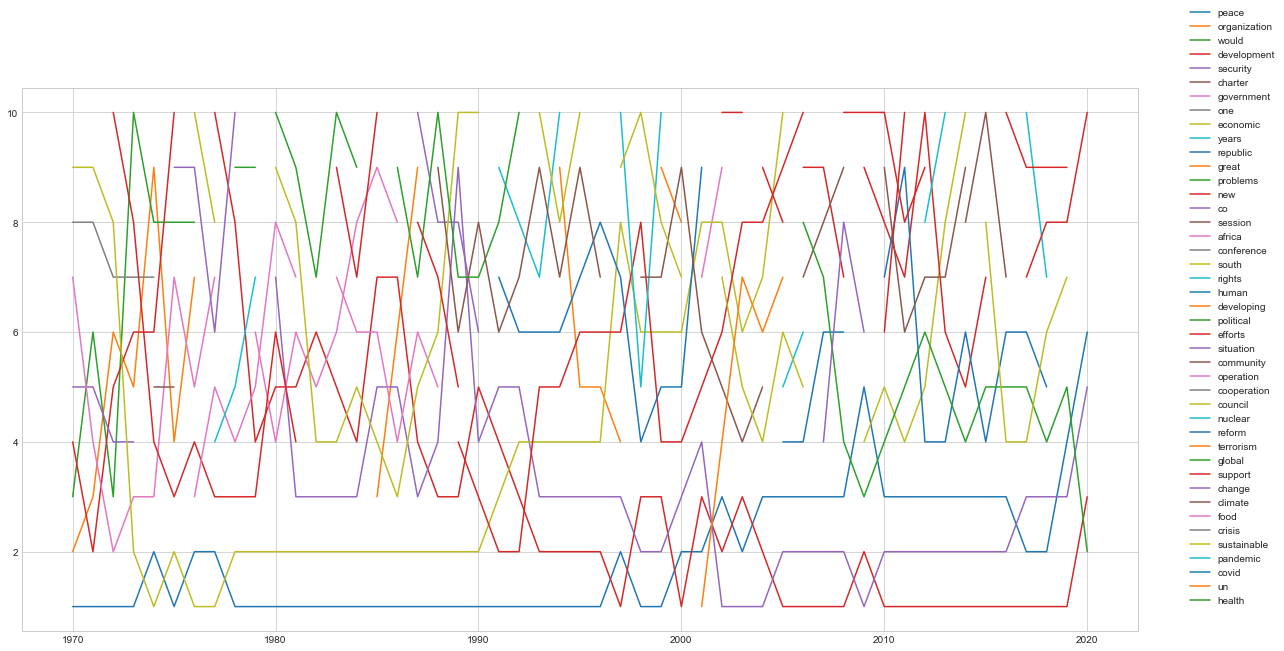

In [217]:
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()

for column in df3.columns:
    vector = df3[column]
    ax.plot(vector, label=column)
fig.legend()
fig.set_figwidth(20)
fig.set_figheight(10)


# Categorize words into subjects

In [289]:
categories = pd.read_csv('../data/Categories.csv', delimiter=';', index_col=1)
categories.head()

,Category,count
word,,
environment,Climate Change,1604
sustainable,Climate Change,7927
change,Climate Change,9113
climate,Climate Change,8582
energy,Climate Change,421


<AxesSubplot:xlabel='Year'>

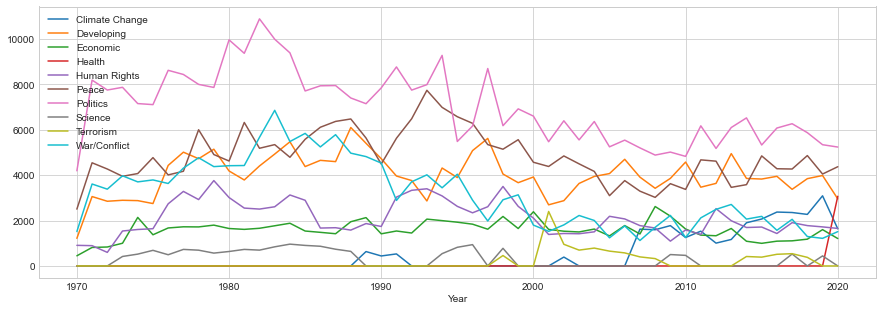

In [334]:
pd.set_option('display.max_colwidth', None)
frequencies = all_speeched_per_year.speech_frequency.to_frame()

frequencies["speech_frequency"] = frequencies["speech_frequency"].apply(lambda x : dict(x))
frequencies["speech_frequency"].to_frame().head()
frequencies = frequencies["speech_frequency"].apply(pd.Series)
frequencies.fillna(0)


groups = []
for group, words in categories.groupby('Category'):
    groups.append(group)
    frequencies[group] = 0
    for word in words.index.values:
        frequencies[group] += df3[word].fillna(0)

subjects = frequencies[groups].drop('Other', axis=1)
subjects.plot(figsize=(15,5))